# Homework 3 - Logistic Regression

# COSC 3337 -  Dr. Rizk

### __About The Data__

The data we'll be using has the following attributes related to heart disease. It's different than the previous HW in terms of data:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: female or male (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death: if the patient died during the follow-up period (boolean) 

For each ```boolean``` variable, a value of 1 = True and 0 = False. For sex, female = 0 and male = 1.


### __Problem Statement__

Remember, data science tasks usually involve some sort of stakeholder who wants to learn something from the data, but don't know what to do. That's where you, the data scientist, come in! As part of a consultant group, you are a data scientist who has been contracted by a research team of cardiologists to try and better understand their group of patients. Specifically, they would like for you to:

- Predict patient survival

In this assignment, we will be using Logistic Regression to try and predict heart disease.

__Notes__

** For the homework assignments, we want you to not only use the tools given in class, but also to be able to _interpret_ the results. There are subjective questions, and the grading will be weighted not necessarily on your conclusion, but how you support your conclusion. To do this, you will need to conceptually understand the methods given in class in order to explain results.

** As a tip, remember that if you're struggling to understand a function or how to use it, each of these packages has documentation on its website that explains exactly how to use it with examples. Google is your friend :)

** Also, when trying to mimic our results, yours does not need to look exactly like the one given, as long as it is readable __and__ answers the question convincingly. Adding comments to code with "#" helps us to understand what you did or were trying to do.

** Please turn in a Jupyter notebook containing your code, its output, and your answers with the file name: 

LASTNAME_FIRSTNAME_3337_HW3.ipynb

If you submit a zip file or anything else, you will receive -5 points.

### __Part 1. Importing Libraries__

Begin by importing the necessary libraries that you'll be using.

Remember, libraries/packages are groups of functions and classes that don't come standard with Python. We are importing these packages so that we can use already-made functions, instead of having to create our own. 

In [1]:
# Data Cleaning and Plotting Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Data Analysis Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Sets parameters for the entire notebook for Seaborn/Matplotlib plots
rcParams['figure.figsize'] = 10, 7
rcParams.update({'font.size': 12})
sns.set_style('darkgrid')

# Turns off warnings
import warnings
warnings.filterwarnings("ignore")

# If the above codeblock doesn't run, make sure you have each of
# of the packages installed and you are running Python 3.0 or greater

In [2]:
################################################### DATA EXPLORATION ##########################################################

Let's take a look at our data

In [3]:
#General information about the data set
heart_df = pd.read_csv('data_hw3.csv')
heart_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
#General information about the dataset
heart_df.info()

#There are a total of 299 patients each with 12 attributes. There doesn't seem to be any null value. Most attributes are of type
# integers while age, platelets, and serum_creatinine are of type float, and the remaining are of type categorical.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  death                     299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
#Statistical information about the data set
heart_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### Part 1: Visual Analysis

__Q1:__ How many patients are there?

- There are a total of 299 patients.

By now, you've had lots of experience with doing plots in Seaborn and Matplotlib. So for the visual analysis, you have a little bit more leash. Create __5__ or more unique plots that help you to explore and understand the data, whether that be analyzing a specific column or comparing different columns. More analysis usually results in extra points. If your answers or analysis are clearly an attempt at an easy answer or just stating what methods you used, you __will__ lose points. Remember, most of the points in the HW assignments come from your interpretation, not just copy and pasting code.

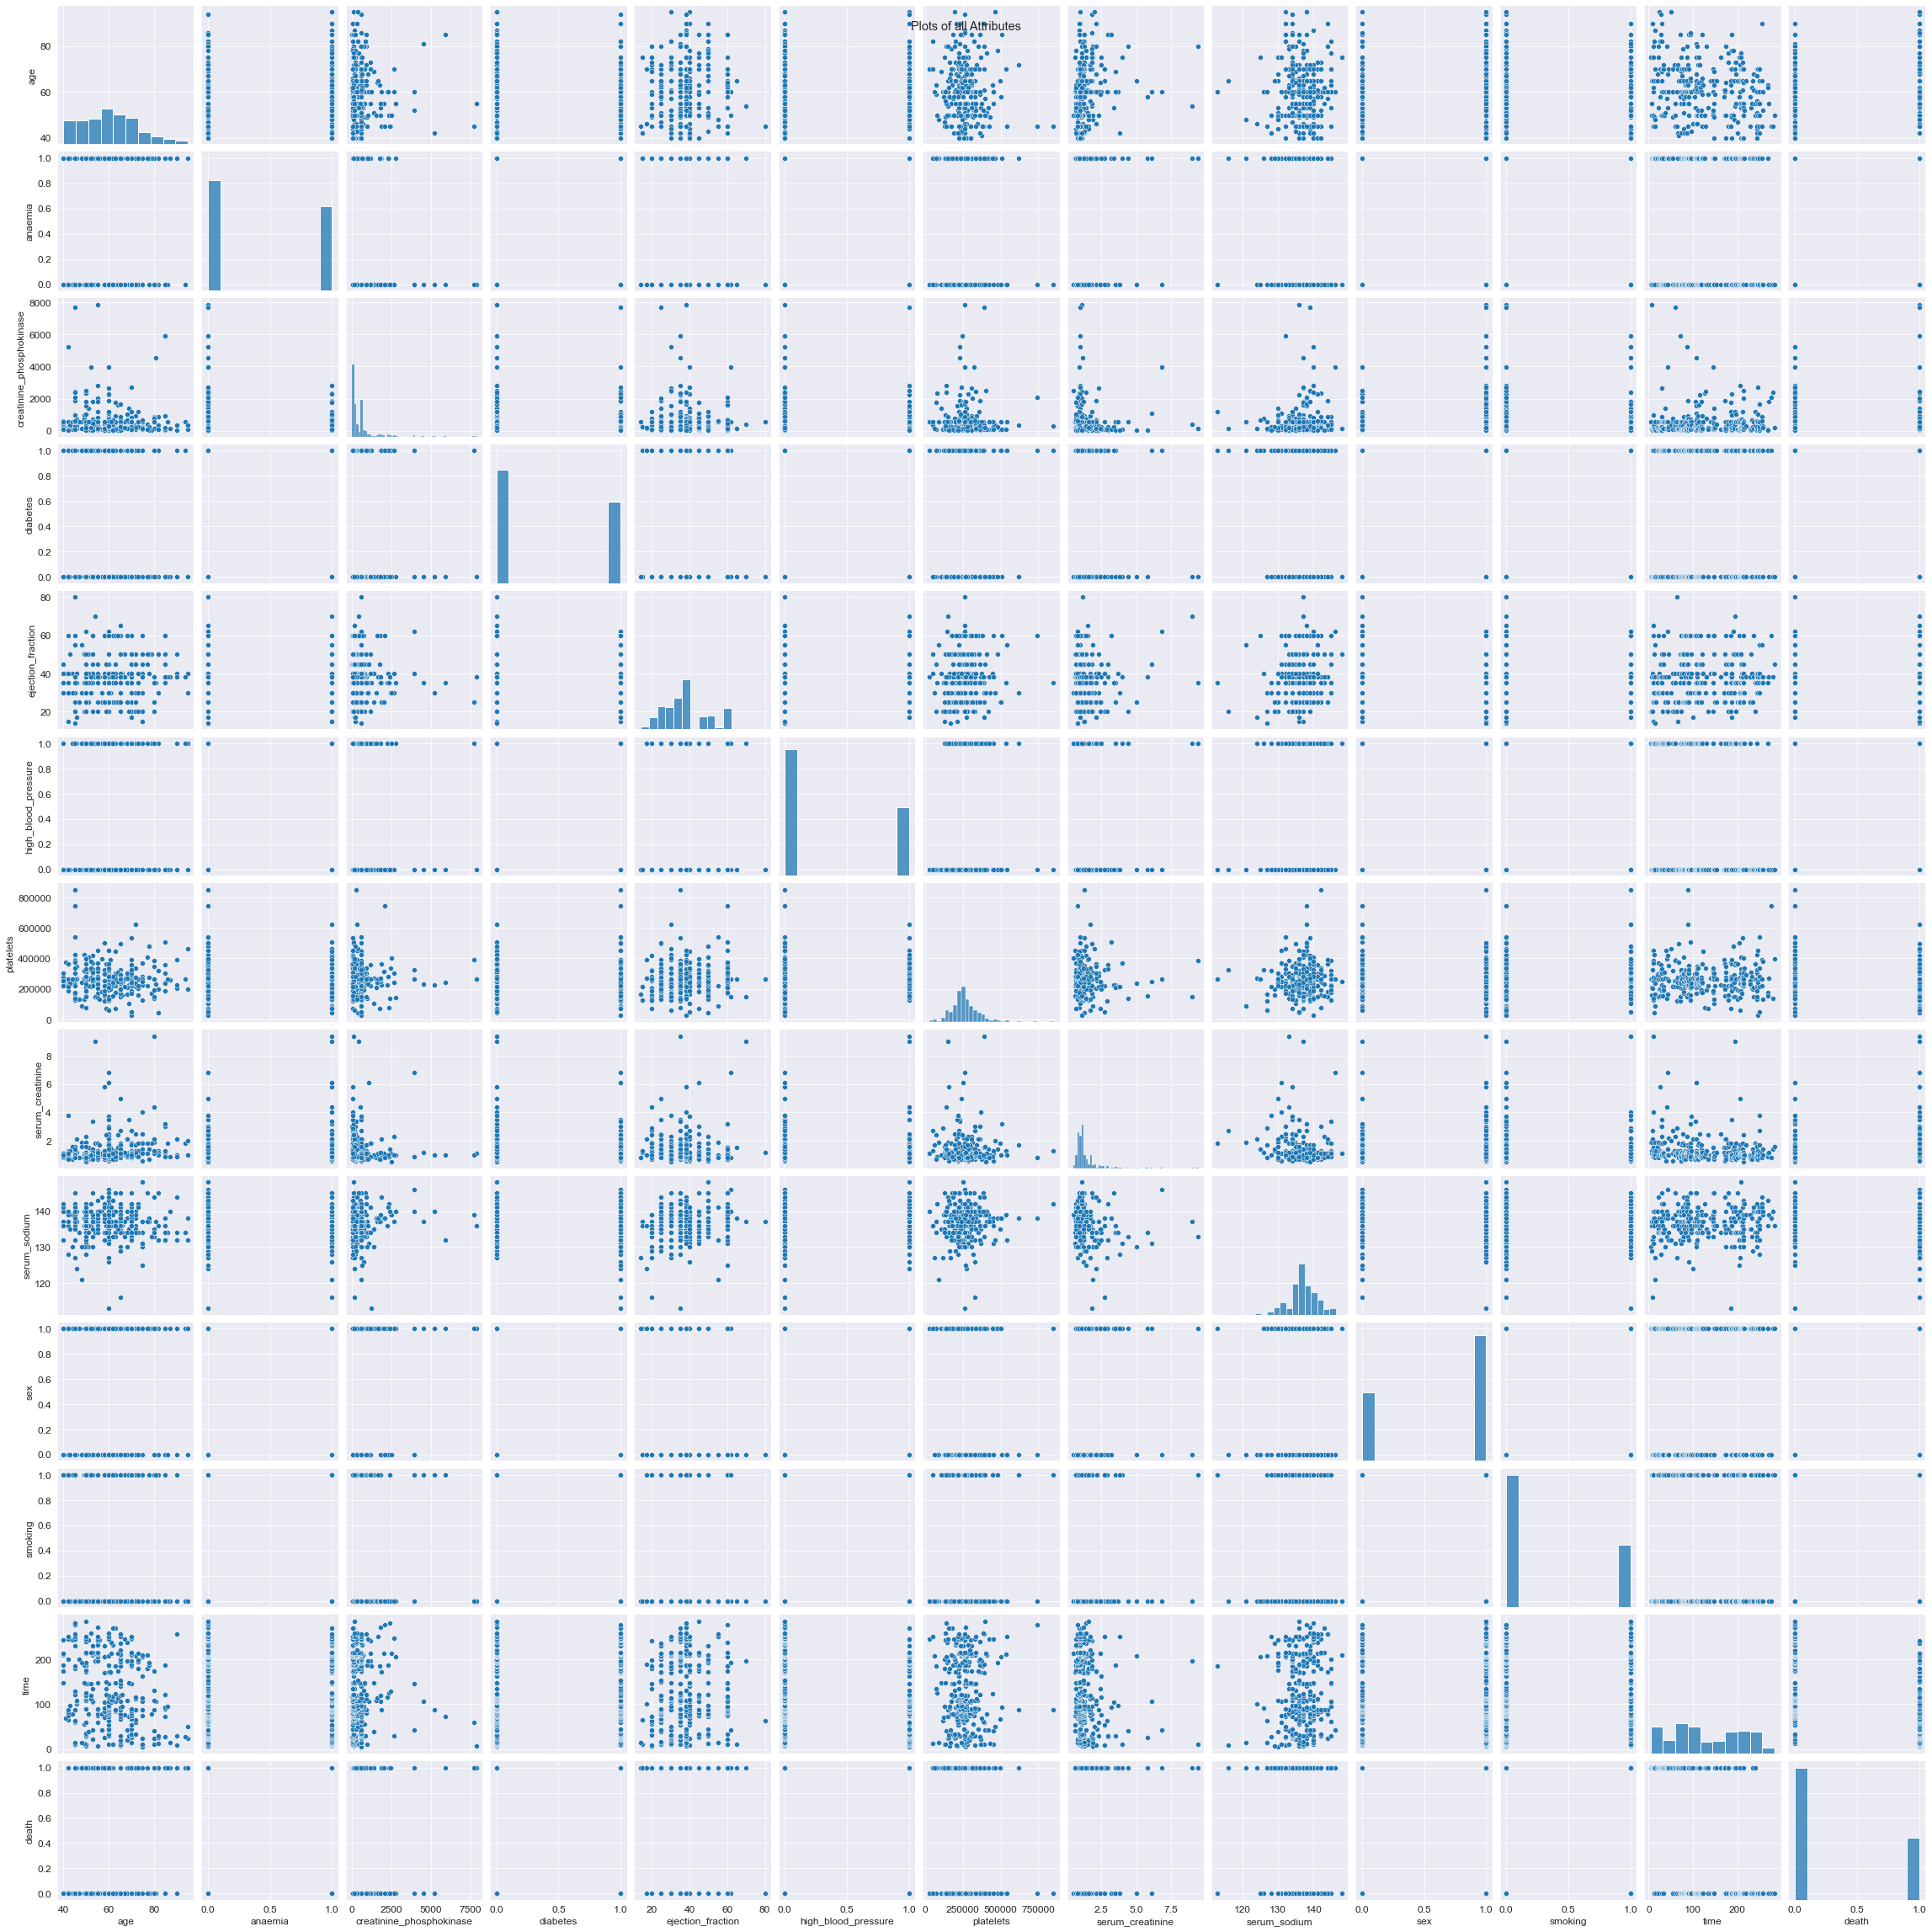

In [6]:
#General overview of all attributes compared with each other.
sns.pairplot(heart_df)
plt.suptitle('Plots of all Attributes')
plt.show()

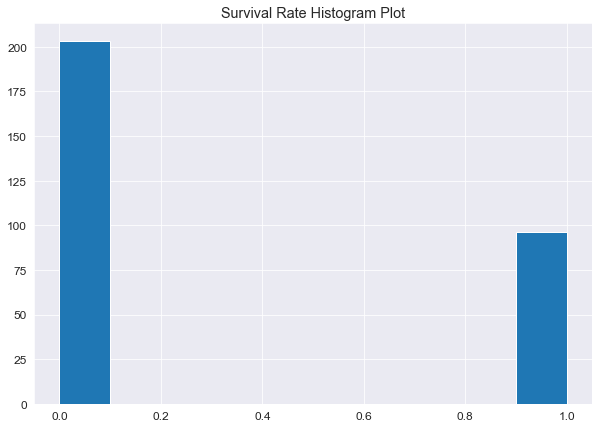

In [7]:
plt.hist(heart_df['death'])
plt.title('Survival Rate Histogram Plot')
plt.show()

#The survival rate seems to be 66% based on current patient list.

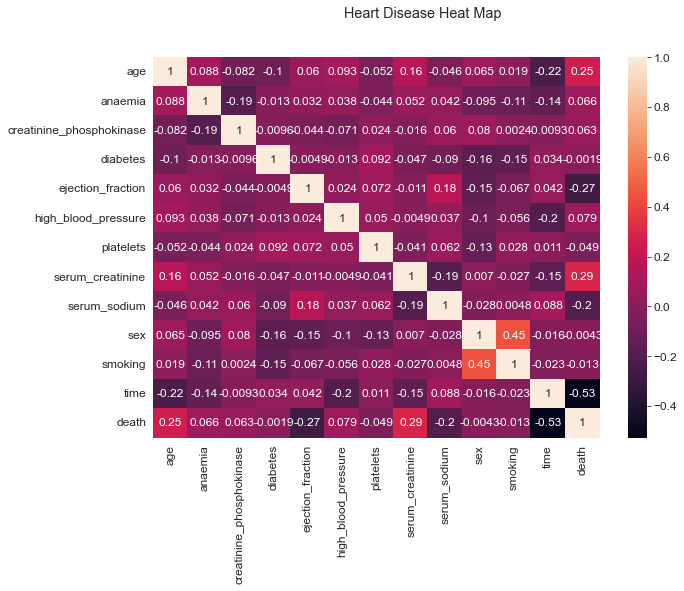

In [8]:
sns.heatmap(heart_df.corr(), annot = True)
plt.suptitle('Heart Disease Heat Map')
plt.show()

#There are multiple categorical attributes and the dependent variable is also categorical so the 
# current heat map is not the best indicator for correlation. However, we can still compare
# correlation values between non-categorical attributes and make sure there are no high correlation.

#Overall there doesn't seem to be high correlation between the non-categorical attributes, specifically
# the highest value is -0.22 between time and age.

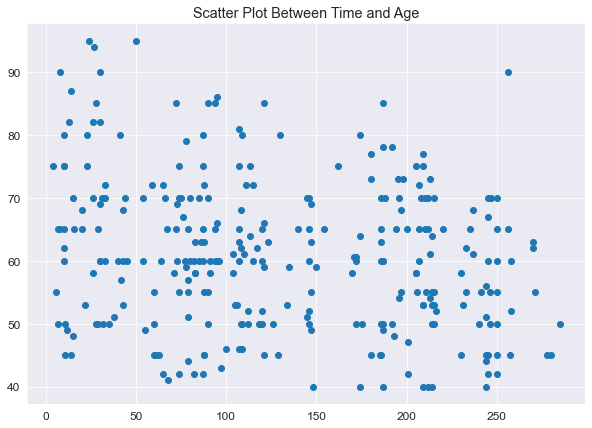

In [9]:
#We can confirm the non-correlation more in a specific graph
plt.scatter(x = heart_df['time'], y = heart_df['age'])
plt.title('Scatter Plot Between Time and Age')
plt.show()

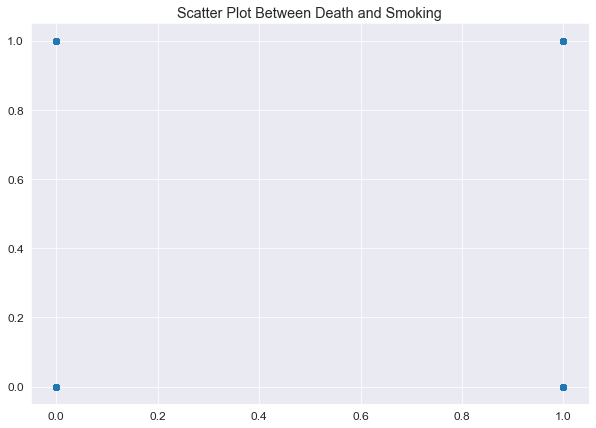

In [10]:
#We can also confirm that we can't use categorical attributes for a categorical target with out proper
# transformation since it does not bring any information such as in the graph below.

plt.scatter(x = heart_df['death'], y = heart_df['smoking'])
plt.title('Scatter Plot Between Death and Smoking')
plt.show()

__Q2:__ Was there anything interesting you learned from your plots? If so, what?

- There is no strong correlation between the non-categorical dependent variables.
- The survival rate of patients seem to be 66%.
- Without proper transformation of the categorical dependent variables, it is not possible to utilize them in a model since they don't bring any useful information.

__Q3:__ Is there anything the data did not tell you that you expected to see?

- I expected to see some correlation between the non-categorical attributes and the categorical target; however, there is no strong correlation between any of them.

### Part 2: Logistic Regression

Since you've had ample experience using Sci-Kit Learn's different functions, you probably recognize by now that almost all of Sci-Kit Learn's classification and regression methods have the same basic structure of 'fit' then 'predict' and maybe some extra functions based on the type of model used (like residuals or coefficients for linear regression). So, for this part, you will be largely on your own, with less detailed instructions. If you have any questions, check out your previous labs, the lecture notes, or the just google the specific function to see how to use it.

First, let's scale and then split the data. You choose what test_size to use. For the scalar, we know that most of our features do not follow a normal distribution (as most are categorical variables), so we will use the MinMaxScaler(). Create the following:

- train_x    (pandas df)
- test_x     (pandas df)    
- train_y    (array)
- test_y     (array)

In [11]:
########################################### DATA PROCESSING ####################################################################

In [12]:
#Seperate independent variables and dependent variable
X = heart_df.drop(labels = ['death'], axis = 1)
y = heart_df['death']
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [13]:
minMax_scaler = MinMaxScaler()
X_scaled = minMax_scaler.fit_transform(X)
X_scaled = pd.DataFrame(data = X_scaled, columns = X.columns)

In [14]:
#Create train and test data from data set
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size = 0.2, random_state = 129)
train_X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
136,0.454545,1.0,0.004593,1.0,0.696970,0.0,0.178082,0.044944,0.685714,0.0,0.0,0.366548
236,0.636364,0.0,0.012248,0.0,0.545455,1.0,0.270215,0.067416,1.000000,1.0,0.0,0.729537
159,0.345455,1.0,0.013524,0.0,0.469697,1.0,0.408413,0.067416,0.742857,1.0,1.0,0.416370
198,0.181818,1.0,0.071319,1.0,0.090909,1.0,0.307795,0.056180,0.600000,0.0,0.0,0.647687
217,0.254545,1.0,0.051544,0.0,0.848485,1.0,0.152625,0.955056,0.685714,0.0,0.0,0.683274
...,...,...,...,...,...,...,...,...,...,...,...,...
248,0.000000,0.0,0.076678,0.0,0.318182,0.0,0.334465,0.056180,0.828571,1.0,1.0,0.747331
190,0.727273,0.0,0.071319,1.0,0.318182,0.0,0.393866,0.179775,0.600000,1.0,0.0,0.604982
40,0.545455,0.0,0.071319,0.0,0.090909,1.0,0.288833,0.149438,0.600000,1.0,1.0,0.096085
231,0.545455,0.0,0.008931,0.0,0.318182,0.0,0.193842,0.067416,0.600000,1.0,1.0,0.725979


In [15]:
################################################### MODEL CREATION #########################################################

Create a Logistic Regression Model and output the accuracy on the training and testing set

In [16]:
model_logistic = LogisticRegression()
model_logistic.fit(train_X, train_y)

LogisticRegression()

In [17]:
model_logistic.score(train_X, train_y)

0.8451882845188284

In [18]:
predictions = model_logistic.predict(test_X)
model_logistic.score(test_X, test_y)

0.8166666666666667

__Q4:__ What interval are the outputs of a logistic regression model contained in?

- The outputs from a logistic regression model are contained in the range from 0 to 1.

__Q5:__ How does a Logistic Regression model classify data in a binary way?

- A logistic regression model classify data in a binary way through predicting the probability that an observation belongs to one of the two classes. After the model decides on a decision threashhold, it will use that threshold to clarify new data based on the given probability. Usually, if it is above the threshold, it will be classified as 1, if it is below the threshold, it will be classified as 0. It is up to the programmers to decide what 1 and 0 mean in each context.

Create a confusion matrix for the testing data.

Add ```plt.grid(b=None)``` after your code if you get gridlines

In [19]:
print(confusion_matrix(test_y, predictions))

[[35  3]
 [ 8 14]]


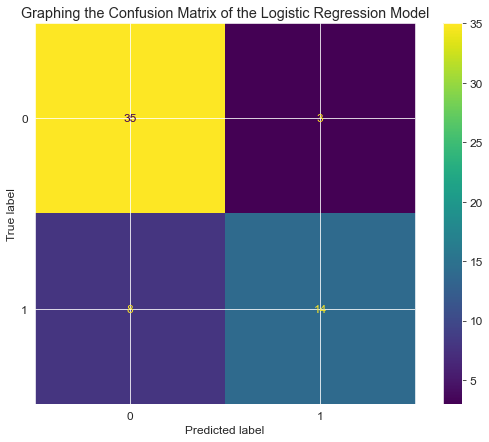

In [20]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_y, predictions))
disp.plot()
plt.title('Graphing the Confusion Matrix of the Logistic Regression Model')
plt.show()

Print the recall

In [21]:
from sklearn.metrics import recall_score

recall = recall_score(test_y, predictions)
print(recall)

0.6363636363636364


__Q6:__ What does the recall represent (Don't just tell me the formula)?

- Recall represents the model's ability to correctly detect positive instances from a dataset. 

Print the precision

In [22]:
from sklearn.metrics import precision_score

precision = precision_score(test_y, predictions)
print(precision)

0.8235294117647058


__Q7:__ What does the precision represent (Don't just tell me the formula)?

- Precision represents the model's ability to avoid false positives.

__Q8:__ Which types of errors would be more costly for this problem, False Positives or False Negatives? Why?

- In this specific problem, false negatives is more costly since false negative can lead to patient death without proper treatment while false positive will only lead to excessive treatment. Thus, recall score is of higher importance.

Now, let's plot the predictions to try and get an idea of how our model performed. Plot the probability predictions of class label 1 (death), not the classification.

In [23]:
############################################### MODEL EVALUATION ###############################################################

In [24]:
probas = model_logistic.predict_proba(test_X)
positive_prediction_probability = probas[:, 1]
positive_prediction_probability = sorted(positive_prediction_probability)

In [25]:
test_y_numpy = test_y.to_numpy()
positive_prediction_probability_when_test_y_predict_1 = positive_prediction_probability.copy()

for index in range (0, len(positive_prediction_probability_when_test_y_predict_1)):
    if test_y_numpy[index] != 1:
        positive_prediction_probability_when_test_y_predict_1[index] = None

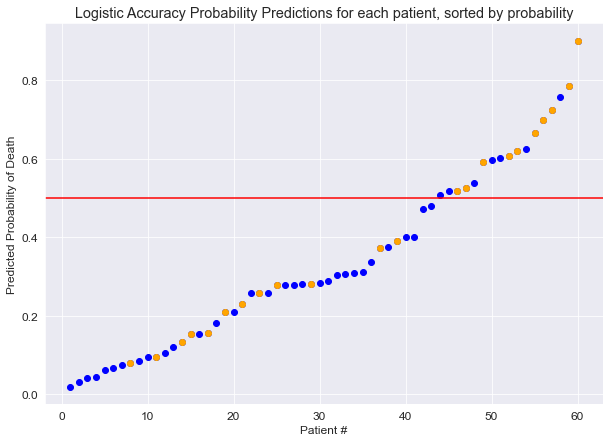

In [26]:
plt.scatter(x = list(range(1, len(positive_prediction_probability) + 1)), y = positive_prediction_probability, color = 'blue')
plt.scatter(x= list(range(1, len(positive_prediction_probability) + 1)),  
           y = positive_prediction_probability_when_test_y_predict_1, color='orange')
plt.axhline(y = 0.5, color = 'red')
plt.title('Logistic Accuracy Probability Predictions for each patient, sorted by probability')
plt.xlabel('Patient #')
plt.ylabel('Predicted Probability of Death')
plt.show()

__Q9:__ Does this plot tell us anything interesting about our model? How well does it classify the data?

- The model performs overall well, with an average accuracy score of >80%. However, the model incorrectly identifies multiple patients with lethal heart diseases as not having fatal heart disease, which is not ideal for the reasons discussed previously. Thus, if the model could improve the performance of correctly identifying positive cases, the final model performance will improve significantly.

Create a data frame of the coefficients of the model

In [27]:
coef_df = pd.DataFrame({'Features': X.columns, 'Coefficients': model_logistic.coef_[0]})
coef_df

,Features,Coefficients
0,age,1.056593
1,anaemia,0.052179
2,creatinine_phosphokinase,0.735387
3,diabetes,-0.050636
4,ejection_fraction,-2.410366
5,high_blood_pressure,-0.055154
6,platelets,-0.413006
7,serum_creatinine,1.699206
8,serum_sodium,-0.962270
9,sex,-0.343683


__Q10:__ What do these coefficients mean? How are they calculated?

- The coefficients represent the effect of each attribute on the probability of the positive (1) class. The coeficients are calculated using either Maximum likelihood estimation (MLE) or a related optimization algorithm. The goal of this algorithm is to find the set of coefficients that maximize the likelihood of the observed data, given the logistic regression model.

__Q11__: Based on that, which features are important to the model?

- Seems like time time has the highest effect on the model at ~(-3.34). This mean that a slight change in time will have a higher effect on the final probability.

Do any other analysis you see fit, whether exploring the data more, assessing the model more intensely, etc.

In [28]:
############################################## IMPROVING MODEL ################################################################

In [29]:
#Using grid search technique to sample hyperperameters for the best potential model
from sklearn.model_selection import GridSearchCV
new_logistic_model = LogisticRegression()

hyperparameters = {'C' : list(range(1, 20)), 'penalty' : ['l1', 'l2'], 'solver' : ['lbfgs', 'sag', 'saga', 'newton-cg', 'lbfgs'],
                   'class_weight' : [None, 'balanced']}
grid = GridSearchCV(new_logistic_model, hyperparameters, cv = 6)
grid.fit(train_X, train_y)

print('Best hyperparameters:', grid.best_params_)
print('Test set score:', grid.score(test_X, test_y))
print('Train set score:', grid.score(train_X, train_y))

#We were able to increase the accuracy of the test score, lets see the recall and precision score of the new updated model.
best_logistic_model = LogisticRegression(**grid.best_params_)
best_logistic_model.fit(train_X, train_y)

Best hyperparameters: {'C': 4, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}
Test set score: 0.8333333333333334
Train set score: 0.8493723849372385


LogisticRegression(C=4)

In [30]:
#Test new model performance
new_recall = recall_score(test_y, best_logistic_model.predict(test_X))
new_precision = precision_score(test_y, best_logistic_model.predict(test_X))

print(new_recall)
print(new_precision)

0.6818181818181818
0.8333333333333334


Finally, write your final report about your conclusions. Remember, you should write 1 - 2 paragraphs about what you did, why you did it, and what it means for the stakeholder. I _don't_ just want a summary of the work you did. I know what you did. I want to know what the analysis told you about the data. 

The data analysis examines the death rate of patients with potential heart diseases based on twelve attributes: age, anemia, high blood pressure, CPK, diabetes, ejection fraction, platelets, sex, serum creatine, serum sodium, smoking, and time. From the ten attributes, age, CPK, ejection fraction, platelets, serum creatine, serum sodium, and time are continuous variables of different scales, while the remaining three attributes are categorical. The dependent variable is death, and it is a binary variable. Moreover, the dependent variable, death, is also categorical. The dataset does not have any null values or missing values. Thus, the data can be examined and utilized to build a model immediately without modification.

Since the data contain multiple categorical variables, building a reliable model is not ideal. Therefore, the analysis first looks at the correlation heat map of the independent variables, showing no high correlation between the independent variables. Next, the study transforms the categorical attributes using the min-max scaler to convert the categorical attributes into a range and limit the scope of the continuous independent attributes. The best model for the situation is logistic regression, which performs well on categorical dependent variables. 

After training, the model has an accuracy score of 85% and 82% for train and test data, respectively. Specifically, the model has a recall score of 0.64 and a precision score of 0.82. In the particular model, a higher recall score is more desirable since people predicted not to have lethal heart disease can still take the medication. Meanwhile, patients with fatal heart diseases that are expected not to be lethal can potentially lose their lives without proper prescription. Therefore, the false negatives in the recall score are of higher importance.

After improving the logistic model through grid search between different hyperparameters, the best-performing logistic model increases accuracy by 2% with test data and remains the same performance with training data. However, the new recall score has improved from 0.63 to 0.68. Since the recall score is of high importance, the increase in recall score is similar to a 5% increase in overall performance. 